# Link Prediction for Drug-Drug Interactions

In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
with open('data/interactions.json') as f:
    ddi_json = json.load(f)

In [3]:
df_drugs = pd.read_csv('data/filtered_dataset.csv')
df_drugs

,Unnamed: 0,name,state,level4,level3,level2,level1,Molecular Weight,logP,Water Solubility,...,Rotatable Bond Count,Polar Surface Area (PSA),pKa (strongest basic),Ghose Filter,Monoisotopic Weight,MDDR-Like Rule,Polarizability,H Bond Acceptor Count,Physiological Charge,Rule of Five
0,5,Bivalirudin,solid,B01AE,B01A,B01,B,2180.2853,-14.00,0.04640,...,66.0,901.57,11.88,0.0,2178.985813,1.0,218.54,37.0,-4.0,0.0
1,6,Leuprolide,solid,L02AE,L02A,L02,L,1209.3983,-2.40,0.03380,...,32.0,429.04,11.92,0.0,1208.645462,1.0,125.24,16.0,1.0,0.0
2,13,Goserelin,solid,L02AE,L02A,L02,L,1269.4105,-5.10,0.02830,...,33.0,495.89,10.91,0.0,1268.641439,1.0,130.74,18.0,1.0,0.0
3,25,Gramicidin D,liquid,R02AB,R02A,R02,R,1811.2530,5.96,0.00390,...,50.0,519.89,NaN,0.0,1810.033419,1.0,194.73,16.0,0.0,0.0
4,33,Desmopressin,solid,H01BA,H01B,H01,H,1069.2200,-6.10,0.11000,...,19.0,435.41,11.77,0.0,1068.426956,1.0,104.78,15.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,14553,Belumosudil,solid,L04AA,L04A,L04,L,452.5180,4.65,0.00289,...,7.0,104.82,4.11,0.0,452.196074,1.0,49.55,6.0,0.0,1.0
2626,14688,Tebipenem pivoxil,NaN,J01DH,J01D,J01,J,497.6300,1.59,0.16700,...,9.0,108.74,6.27,0.0,497.165428,1.0,53.39,6.0,0.0,1.0
2627,14698,Tosufloxacin,NaN,J01MA,J01M,J01,J,404.3490,0.47,0.07620,...,3.0,99.76,9.80,1.0,404.109625,0.0,37.18,7.0,0.0,1.0
2628,14931,Linzagolix,solid,H01CC,H01C,H01,H,508.4200,3.88,0.00198,...,6.0,114.40,-3.50,0.0,508.055206,1.0,45.39,7.0,-1.0,0.0


## Create Adjacency matrix

In [4]:
def adjacency_matrix(df):
    # create a matrix of zeros with the same shape as the final adjacency matrix
    matrix = np.zeros((len(df), len(df)), dtype=int)

    # loop through each drug and set the corresponding values in the matrix to 1
    for i, drug in enumerate(df['name']):
        interacting_drugs = ddi_json[drug]
        indices = df.index[df['name'].isin(interacting_drugs)].tolist()
        matrix[i, indices] = 1

    # convert the matrix to a dataframe and set the column names and index
    df_matrix = pd.DataFrame(matrix, columns=df['name'], index=df['name'])

    return df_matrix

df_matrix = adjacency_matrix(df_drugs)

In [5]:
df_matrix

name,Bivalirudin,Leuprolide,Goserelin,Gramicidin D,Desmopressin,Cetrorelix,Daptomycin,Abarelix,Pyridoxal phosphate,Cyanocobalamin,...,Naphthoquine,Odevixibat,Melphalan flufenamide,Deucravacitinib,Tegoprazan,Belumosudil,Tebipenem pivoxil,Tosufloxacin,Linzagolix,Methionine C-11
name,,,,,,,,,,,,,,,,,,,,,
Bivalirudin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Leuprolide,0,0,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Goserelin,0,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Gramicidin D,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Desmopressin,0,1,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Belumosudil,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Tebipenem pivoxil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tosufloxacin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
import itertools
def random_drug_pairs(names, p, random_state=None):
    # Calculate the total number of possible pairs
    num_pairs = int(len(names) * (len(names) - 1) / 2)

    # Calculate the number of pairs to select
    num_selected_pairs = int(p * num_pairs)

    # Generate all possible pairs of names using itertools
    all_pairs = list(itertools.combinations(names, 2))

    # Select a random subset of pairs
    selected_pairs = pd.Series(all_pairs).sample(n=num_selected_pairs, random_state=random_state)

    # Return the selected pairs
    return selected_pairs

def exclude_pairs_from_adjacency_matrix(df_matrix, excluded_pairs):
    col_inds1 = np.array([df_matrix.columns.get_loc(drug1) for drug1, _ in excluded_pairs])
    col_inds2 = np.array([df_matrix.columns.get_loc(drug2) for _, drug2 in excluded_pairs])
    values = df_matrix.values[col_inds1, col_inds2]
    df_matrix.values[col_inds1, col_inds2] = 0
    df_matrix.values[col_inds2, col_inds1] = 0
    return values

def get_pairs_from_adjacency_matrix(df_matrix, excluded_pairs):
    col_inds1 = np.array([df_matrix.columns.get_loc(drug1) for drug1, _ in excluded_pairs])
    col_inds2 = np.array([df_matrix.columns.get_loc(drug2) for _, drug2 in excluded_pairs])
    values = df_matrix.values[col_inds1, col_inds2]
    return values

def set_pairs_in_adjacency_matrix(df_matrix, pairs_to_set, pair_values):
    col_inds1 = np.array([df_matrix.columns.get_loc(drug1) for drug1, _ in pairs_to_set])
    col_inds2 = np.array([df_matrix.columns.get_loc(drug2) for _, drug2 in pairs_to_set])
    df_matrix.values[col_inds1, col_inds2] = pair_values

### Replace some pairs in the adjacency matrix and run link prediction, get ROCAUC score on the removed pairs

In [7]:
# train, test split 
# train set : remove selected pairs from adj matrix
# test set: the excluded pairs
excluded_pairs = random_drug_pairs(df_drugs['name'], 0.20, 42)
excluded_pair_values = exclude_pairs_from_adjacency_matrix(df_matrix, excluded_pairs)

In [8]:
from sknetwork.linkpred import NNLinker
from sknetwork.visualization import svg_graph, svg_bigraph
from sklearn.metrics import RocCurveDisplay
import numpy as np
from sklearn import metrics

In [9]:
def get_link_pred_scores(df_matrix, pairs_to_predict, true_pair_values):
    linker = NNLinker(n_neighbors=2630, threshold=0)
    links = linker.fit_predict(df_matrix.to_numpy())
    df_predicted = pd.DataFrame.sparse.from_spmatrix(links)
    df_predicted.columns = df_matrix.columns
    predictions = get_pairs_from_adjacency_matrix(df_predicted, pairs_to_predict)
    print(f"ROCAUC score: {metrics.roc_auc_score(true_pair_values, predictions)}")
    RocCurveDisplay.from_predictions(true_pair_values, predictions)

C:\Users\Georg\AppData\Roaming\Python\Python39\site-packages\sknetwork\utils\check.py:216: Warning: The number of neighbors must be lower than the number of nodes with known labels. Changed accordingly.
  warnings.warn(Warning("The number of neighbors must be lower than the number of nodes with known labels. "


ROCAUC score: 0.9689347313012144


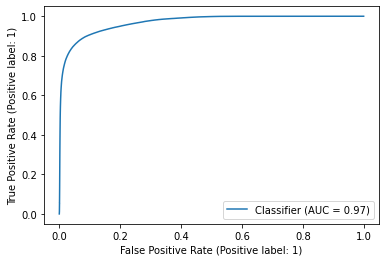

In [10]:
get_link_pred_scores(df_matrix, excluded_pairs, excluded_pair_values)

# Stacking CatBoost and Link Prediction

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from pandas.core.common import random_state
import numpy as np

def load_catboost():
    # load catboost_df
    catboost_df = pd.read_csv('catboost/datasets/catboost_df.csv', index_col=0)
    # get the categorical and float features
    cat_features = list(catboost_df.select_dtypes(include=['object']).columns)
    float_features = list(catboost_df.select_dtypes(include=['float64']).columns)

    for feature in float_features:
        # Fill NaN values with the mean of non-missing values in the same column
        mean_value = catboost_df[feature].mean()
        catboost_df[feature].fillna(mean_value, inplace=True)

    for feature in cat_features:
        catboost_df[feature] = catboost_df[feature].astype(str)
    return catboost_df

In [12]:
catboost_df = load_catboost()
catboost_df = catboost_df.set_index(['name_x', 'name_y']).to_dict('index')

C:\Users\Georg\AppData\Local\Temp\ipykernel_16160\2467972683.py:11: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  catboost_df = pd.read_csv('catboost/datasets/catboost_df.csv', index_col=0)


In [13]:
import gc
def get_features_of_pairs(pairs):
    global catboost_df
    # convert the DataFrame to a dictionary with the tuple of the relevant columns as the key

    # use a list comprehension to select the rows in the order of the tuples in the tuple_list
    matching_rows = [catboost_df[tuple_] for tuple_ in pairs]

    catboost_test_df = pd.DataFrame.from_dict(matching_rows)
    
    del matching_rows
    gc.collect()
    
    return catboost_test_df

In [16]:
catboost_test_df = get_features_of_pairs(excluded_pairs)
catboost_test_df

,state_x,level4_x,level3_x,level2_x,level1_x,Molecular Weight_x,logP_x,Water Solubility_x,logS_x,Bioavailability_x,...,Polar Surface Area (PSA)_y,pKa (strongest basic)_y,Ghose Filter_y,Monoisotopic Weight_y,MDDR-Like Rule_y,Polarizability_y,H Bond Acceptor Count_y,Physiological Charge_y,Rule of Five_y,interaction
0,solid,D07AC,D07A,D07,D,376.4617,2.35,0.031000,-4.100000,1.0,...,95.74,-1.00,0.0,238.070205,0.0,21.81,5.0,-1.0,1.0,0
1,solid,G04CB,G04C,G04,G,528.5297,5.79,0.000908,-5.800000,0.0,...,118.20,12.13,1.0,354.205576,0.0,40.85,6.0,2.0,1.0,0
2,solid,N05AH,N05A,N05,N,383.5070,2.81,0.040300,-4.000000,1.0,...,19.37,8.76,1.0,261.129969,0.0,29.54,3.0,1.0,1.0,1
3,gas,V03AN,V03A,V03,V,4.0026,0.00,1.500000,-3.455505,1.0,...,77.84,-1.80,0.0,173.068808,0.0,16.35,4.0,-1.0,1.0,0
4,solid,A06AD,A06A,A06,A,120.3680,-0.84,710.000000,-3.455505,1.0,...,38.82,7.03,1.0,390.166746,0.0,38.69,3.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691422,solid,N05CA,N05C,N05,N,250.2936,1.91,0.324000,-2.900000,1.0,...,32.26,9.76,0.0,337.243936,0.0,43.08,2.0,1.0,0.0,0
691423,solid,L01CE,L01C,L01,L,586.6780,2.78,0.107000,-3.700000,1.0,...,125.22,12.41,0.0,321.164833,0.0,17.86,6.0,1.0,1.0,0
691424,solid,J01EA,J01E,J01,J,354.4100,2.49,0.142000,-3.400000,1.0,...,51.37,7.51,1.0,340.226312,0.0,39.14,2.0,1.0,1.0,0
691425,solid,D05BA,D05B,D05,D,216.1920,1.78,0.164000,-3.100000,1.0,...,46.53,-0.53,1.0,306.219495,0.0,35.40,2.0,0.0,1.0,0


## Get ROCAUC score of catboost on the same excluded pairs from above

In [14]:
# load model
inference = CatBoostClassifier()
inference.load_model("catboost/models/catboost_model2.cbm")

In [17]:
# get predictions on excluded pairs
catboost_predictions = inference.predict_proba(catboost_test_df)[:,1]
metrics.roc_auc_score(excluded_pair_values, catboost_predictions)

0.852876941065583

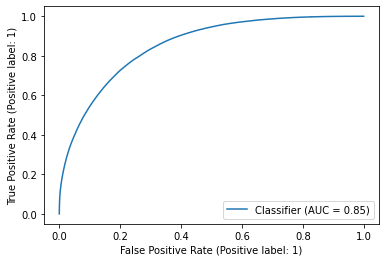

In [19]:
RocCurveDisplay.from_predictions(excluded_pair_values, catboost_predictions)

## Replace the same exluded pairs with their catboost predictions

In [24]:
set_pairs_in_adjacency_matrix(df_matrix, excluded_pairs, [1 if x > 0.5 else 0 for x in catboost_predictions])

C:\Users\Georg\AppData\Roaming\Python\Python39\site-packages\sknetwork\utils\check.py:216: Warning: The number of neighbors must be lower than the number of nodes with known labels. Changed accordingly.
  warnings.warn(Warning("The number of neighbors must be lower than the number of nodes with known labels. "


ROCAUC score: 0.9688742442026064


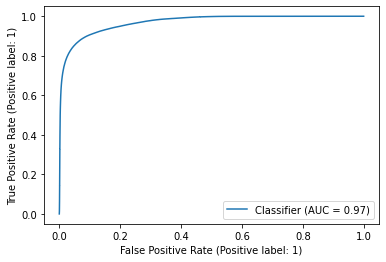

In [25]:
get_link_pred_scores(df_matrix, excluded_pairs, excluded_pair_values)

The AUC is about the same at link prediction alone. This is likely because the information on each drug was already mostly complete. All but a few of the interactions for the drugs we tested are we passed to the link predictor. Providing information on maybe a few more interactions per drug probably isn't going to help the model much.

But the gains should become significant when we know hardly anything about a particular drug.

## Remove all interactions for all pairs containing a set of 100 drugs and replace with Catboost Predictions

In [27]:
def get_all_pairs(drug_name):
    x = [(drug_name, _) for _ in df_drugs['name']]
    y = [(_, drug_name) for _ in df_drugs['name']]
    xy = np.append(x, y, axis=0)
    point_tuples = [tuple(point) for point in xy.tolist()]
    return pd.Series(point_tuples)

def replace_with_catboost(df_matrix, pairs):
    cat_feats = get_features_of_pairs(pairs)
    cat_pred = inference.predict(cat_feats)
    print(cat_pred)
    set_pairs_in_adjacency_matrix(df_matrix, pairs, cat_pred)

In [ ]:
df_matrix = adjacency_matrix(df_drugs)

pairs = pd.Series([])
pair_values = np.array([])
for i in range(100):
    if i == 0:
        pairs = get_all_pairs(df_drugs['name'].iloc[i])
        pair_values = np.append(pair_values, get_pairs_from_adjacency_matrix(df_matrix, pairs))
    else:
        curr = get_all_pairs(df_drugs['name'].iloc[i])
        pairs = pairs.append(curr)  
        pair_values = np.append(pair_values, get_pairs_from_adjacency_matrix(df_matrix, curr))

In [ ]:
cat_feats = get_features_of_pairs(pairs)
cat_pred = inference.predict_proba(cat_feats)[:,1]
# need to threshold predictions since this particular implementation of link prediction treats weighed edges the same as zero for some reason
# the threshold needs to be tuned
cat_pred = [1 if x >= 0.26 else 0 for x in cat_pred] 
set_pairs_in_adjacency_matrix(df_matrix, pairs, cat_pred)

#### Baseline: CatBoost alone

In [154]:
cat_pred = inference.predict_proba(cat_feats)

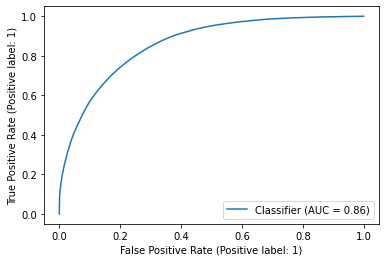

In [155]:
RocCurveDisplay.from_predictions(pair_values, cat_pred[:,1])

### CatBoost then link prediction

C:\Users\Georg\AppData\Roaming\Python\Python39\site-packages\sknetwork\utils\check.py:216: Warning: The number of neighbors must be lower than the number of nodes with known labels. Changed accordingly.
  warnings.warn(Warning("The number of neighbors must be lower than the number of nodes with known labels. "


ROCAUC score: 0.8839671930410578


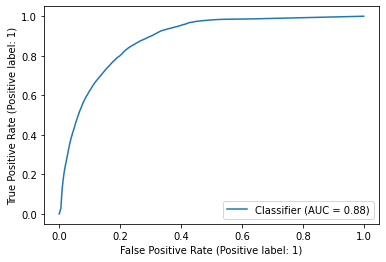

In [180]:
get_link_pred_scores(df_matrix, pairs, pair_values)